<a href="https://colab.research.google.com/github/GilbertoRocha/Estudos/blob/master/FormacaoCientistaDadosPythoneR/Python/Analise_de_variancia_(Anova).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teste de Anova ou chamado de analise de variância

Serve para realizar testes de hipoteses

Usada para comparar os dados de três ou mais grupos

Possui uma variável quantitativa e uma ou mais categóricas

Ao invés se comparar os "pares" do grupo, esse teste fica "observando" todos os grupos do dataset

Busca a variação entre os grupos comparado com a variação "dentro do grupo".
Isso ajuda a ignorar "o acaso" dentro de cada grupo, e passa a observar a variação entre os grupos apenas.

Teste de hipotese exemplar: Comparaçao do tempo de efeito de três remedios, em varias pessoas

H0 (hipotese nula): Não há diferença significativa no tempo de cura entre as diferentes marcas de remédios.

Ha (hipotese alternativa): existe uma diferença significativa no tempo de cura entre as diferentes marcas de remédios.



Nesse caso como tem varias comparações por causa de posusir três grupos, não é indicado usar a T de Student, pois varias comparações induzem ao erro do tipo 1


Formula:
$F(X,Y)$

Aonde:

$X$ é o grau de liberdade (numero de grupos -1)

$Y$ é o grau de liberdade no denominador (numero de observações - numero de grupos)


$H0$ é a hipotese nula, no exemplo não á variação significativa entre os grupos

$Valor-p < alfa$ significa que existe variação entre os grupos



Agora se tiver mais de um fator, neste caso, tres remedios, e as observações são separadas também entre homens e mulheres. Neste caso é recomendado o chamado "teste de Tukey"



In [0]:
# bibliotecas
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt
%matplotlib inline
from io import StringIO

In [3]:
# simula a leitura de um csv
arq = StringIO("""Sexo;Remedio;Horas
F;A;5
F;A;10
F;A;7
F;A;7
M;A;7
M;A;6
M;A;9
M;A;9
F;B;5
F;B;5
F;B;5
F;B;8
M;B;7
M;B;8
M;B;10
M;B;7
F;C;10
F;C;10
F;C;6
F;C;6
M;C;10
M;C;6
M;C;10
M;C;5""")

tratamento = pd.read_csv(arq, sep=';')
tratamento.head()

,Sexo,Remedio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7


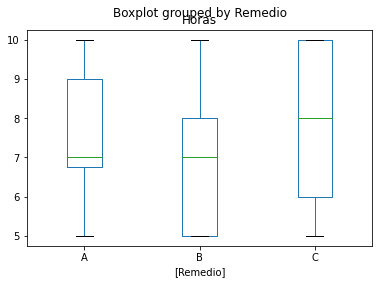

In [10]:
# visualiza os dados em um boxplot agrupado por remedio
tratamento.boxplot(by='Remedio', grid = False)

In [13]:
# teste com um fator, ou seja, desconsiderando o sexo

# e feito uma regressao primeiro
modelo1 = ols('Horas ~ Remedio', data = tratamento).fit()

#pega o resultado da anova
resultado1 = sm.stats.anova_lm(modelo1)
print(resultado1)

            df     sum_sq   mean_sq         F    PR(>F)
Remedio    2.0   4.083333  2.041667  0.537618  0.591966
Residual  21.0  79.750000  3.797619       NaN       NaN


In [15]:
# faz com dois fatores

# necessario fazer a regressao primeiro
modelo2 = ols('Horas ~ Remedio * Sexo', data = tratamento).fit()

# recebe o resultado da anova
resultado2 = sm.stats.anova_lm(modelo2)
# pega o valor de P e compara com o alfa
print(resultado2)

                df     sum_sq   mean_sq         F    PR(>F)
Remedio        2.0   4.083333  2.041667  0.532609  0.596042
Sexo           1.0   4.166667  4.166667  1.086957  0.310948
Remedio:Sexo   2.0   6.583333  3.291667  0.858696  0.440360
Residual      18.0  69.000000  3.833333       NaN       NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   -0.625 0.7861 -3.0803 1.8303  False
     A      C    0.375    0.9 -2.0803 2.8303  False
     B      C      1.0 0.5668 -1.4553 3.4553  False
---------------------------------------------------


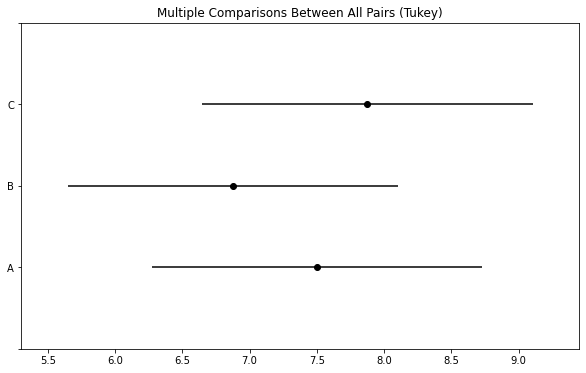

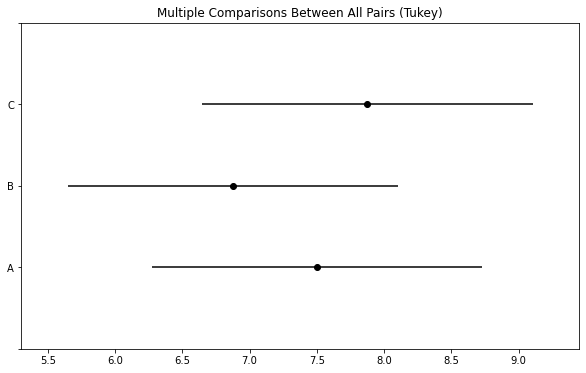

In [19]:
# Caso o teste da anova aponde uma diferença, então usamos o teset de Tukey para ver a diferenca
mc = MultiComparison(tratamento['Horas'], tratamento['Remedio'])
resultado_teste = mc.tukeyhsd()
# ja exibe se deve rejeitar (reject) ou nao, com base no alfa padrao 0.05 (e o mais utilizado)
print(resultado_teste)

# grafico proprio para esse teste de tukey
resultado_teste.plot_simultaneous()
